<a href="https://colab.research.google.com/github/dcastf01/object_detection_TFM/blob/main/Data_analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook to study the datasets

In [1]:
#@title Tarjeta ofrecida por nvidia
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [2]:
#@title Descargar repositorios e instalar librerias
# %%capture

import time
import pathlib

import os
import pandas as pd
import tqdm


start_time = time.time()
!git clone https://github.com/dcastf01/colab_utils.git
!git clone https://github.com/dcastf01/object_detection_TFM.git
!pip install git+https://github.com/tensorflow/examples.git
!pip install tensorflow-addons
!pip install -U tfds-nightly
!pip install pydub
!pip install opencv-python-headless==4.2.0.34
!pip install tf_slim
!pip install pycocotools
# Clone the tensorflow models repository if it doesn't already exist

Cloning into 'colab_utils'...
remote: Enumerating objects: 152, done.
remote: Counting objects: 100% (152/152), done.
remote: Compressing objects: 100% (135/135), done.
remote: Total 152 (delta 85), reused 30 (delta 14), pack-reused 0
Receiving objects: 100% (152/152), 163.61 KiB | 5.84 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Cloning into 'object_detection_TFM'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (304/304), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 304 (delta 157), reused 159 (delta 59), pack-reused 0
Receiving objects: 100% (304/304), 24.43 MiB | 8.45 MiB/s, done.
Resolving deltas: 100% (157/157), done.
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-c93q97va
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-c93q97va
  Created wheel for tensorflow-examples: filename=tensorflow_examples-6492d14b42236467bffc573bcb0fe87218f11ec4_-cp37-none-an

##Descargar y crear dataframe

##Compcars

In [5]:
from object_detection_TFM.dataset.compcars import compcar_analisis

In [6]:
path_txt="/content/object_detection_TFM/dataset/compcars/id_drive_to_download.txt"
images_path="/content/data/image"
label_path="/content/data/label"
filename_csv_with_data="/content/object_detection_TFM/dataset/compcars/all_information_compcars.csv"

In [7]:
%%time
from colab_utils.utils.download_files import download_file_from_google_drive,generate_id_destination_to_download
for id, destination in generate_id_destination_to_download(path_txt).items():
  download_file_from_google_drive(id,destination)
!bash /content/object_detection_TFM/dataset/compcars/unzip_remove_files.sh

id: 1T9K-7-K2bHFepntxIz4guYaqPfRWYW8p destination: data.zip
id: 1Hq53fIctob6Dh3TiyDvNkWI10Z-pDruV destination: data.z22
id: 1i9nsf6g_jV46vMaz8ZqshG6vJOJFvDDL destination: data.z21
id: 1ewPYhpmJY9Ug-GzKZJ_B6eSEsnnoaXeK destination: data.z20
id: 1bweCNot6B8wk6KhcnDmdaguxRD7kxEIp destination: data.z19
id: 1WfENLN1QsmHNTBZjqNkRp9g7hN1tv1wq destination: data.z18
id: 1HMxnsz5-u4OM9UgLM30PLQYGIl4bwC_L destination: data.z17
id: 1BBM7fT0rs_-S15llKPwV2uv7K8lVpG5X destination: data.z16
id: 1WTajdHaJ0sYo2gBOvCAtWNoM9S9W7aYv destination: data.z15
id: 1Fo1xpfuRWcLk4Yt-bdFMgmW99e3X1SBM destination: data.z14
id: 1la7Jt8ti2yxRtUG_4YC4zWPId37ja5jF destination: data.z13
id: 1HfW88qqiuKBQWRnZJE9yWMU7_K3Rnr0_ destination: data.z12
id: 1QHGbUiU5CwgSAppJFLpVrTlLm8vI9dK9 destination: data.z11
id: 1i6szbo8UYNmuoA3eLwUd5RyGV6l5C-qt destination: data.z10
id: 1Td81PVNWAH_LEgjPX3bZiH3-OzwVAfSK destination: data.z09
id: 1nd3J1WZ81eaJuNw8LJ_-Azouo7uO8221 destination: data.z08
id: 1Qy9FrgJT-N33HXKrwPAhDe7cg2Uwd95z de

In [8]:
%%time
df=compcar_analisis.get_df_from_files(images_path,label_path)

6335it [17:02,  6.20it/s]


CPU times: user 27min 21s, sys: 29.9 s, total: 27min 51s
Wall time: 28min 34s


In [9]:
#@title Exportar dataframe
df.to_csv(filename_csv_with_data)

In [10]:
#@title Cargar dataframe from csv
from object_detection_TFM.dataset.compcars.compcar_analisis import set_type_data_compcars
df=pd.read_csv(filename_csv_with_data,index_col =[0])
df=set_type_data_compcars(df)
df["extra"]=df["model_id"].astype(str)+df["released_year"].astype(str)

In [11]:
from object_detection_TFM.dataset.analisis_dataset import create_pareto_diagram

    viewpoint  cumpercentage
4       49301      36.058248
5       31150      58.841040
3       23551      76.066001
1       18431      89.546246
2       13513      99.429516
-1        780     100.000000


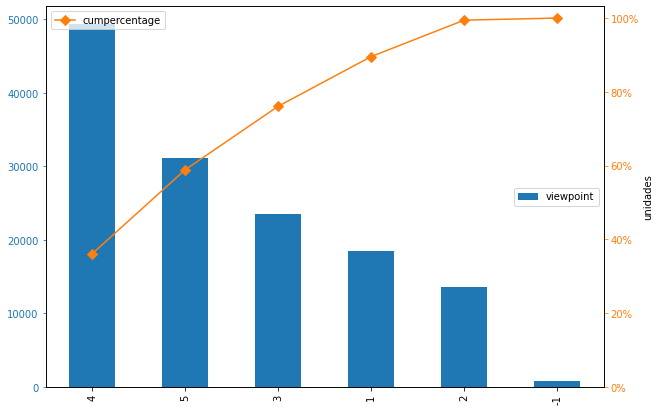

In [12]:
create_pareto_diagram(df,"viewpoint")


Debido a que la categoría 4 ( frontales algo ladeadas) y la categoría 1 (frontales) suman más que la 5 y la dos optaremos por utilizar imágenes frontales.

     make_id  cumpercentage
73      5720       4.183550
77      5319       8.073812
39      4908      11.663473
78      4657      15.069555
81      4531      18.383482
..       ...            ...
65        16      99.970744
16        14      99.980984
147       13      99.990492
161       11      99.998537
107        2     100.000000

[163 rows x 2 columns]


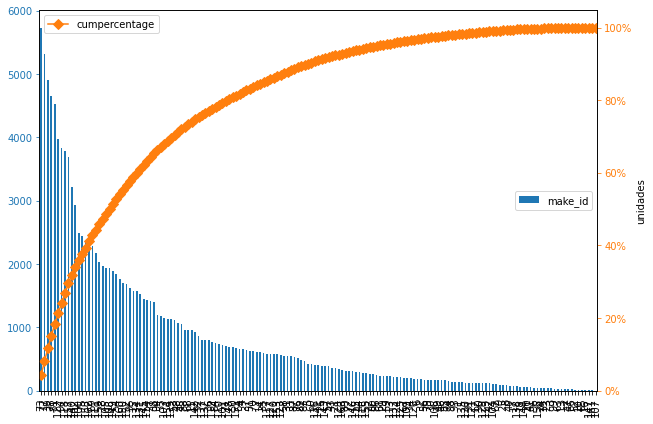

In [13]:
create_pareto_diagram(df,"make_id")

Se observa el desbalanceo que existe de imagenes respecto al año de fabricación, por lo que para normalizar los datos se optará a quitar está variable

      model_id  cumpercentage
196        303       0.221611
1915       288       0.432251
68         283       0.639235
127        272       0.838173
1917       237       1.011512
...        ...            ...
1469         1      99.997074
1997         1      99.997806
1903         1      99.998537
1902         1      99.999269
1338         1     100.000000

[1716 rows x 2 columns]


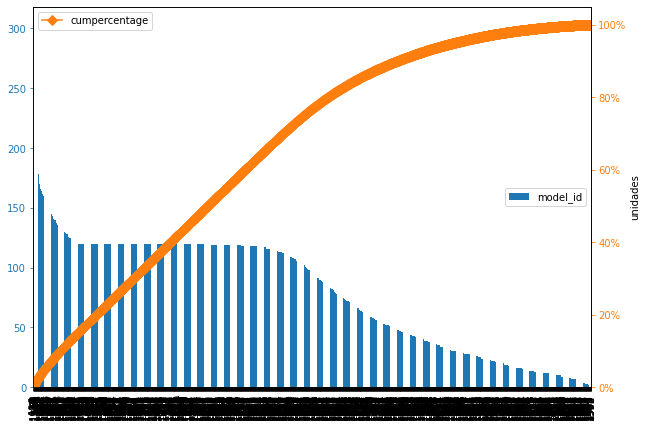

In [14]:
create_pareto_diagram(df,"model_id")

Se observa cierto desbalanceo de imágenes por lo que habrá que aplicar en el entrenamiento alguna técnica para equilibrar los pesos de la red

         released_year  cumpercentage
2014             29324      21.447274
2013             27298      41.412753
2012             20230      56.208768
2011             17517      69.020523
2010             13406      78.825534
2015             10111      86.220616
2009              9457      93.137370
2008              4133      96.160204
2007              1604      97.333353
2006              1248      98.246127
2004               744      98.790281
2016               551      99.193277
2005               449      99.521671
unknown            343      99.772538
2002               162      99.891023
1955                40      99.920279
1972                21      99.935638
2003                14      99.945877
2000                14      99.956117
1963                12      99.964893
1951                 9      99.971476
5008                 8      99.977327
1993                 8      99.983178
1965                 8      99.989029
1962                 7      99.994149
1971        

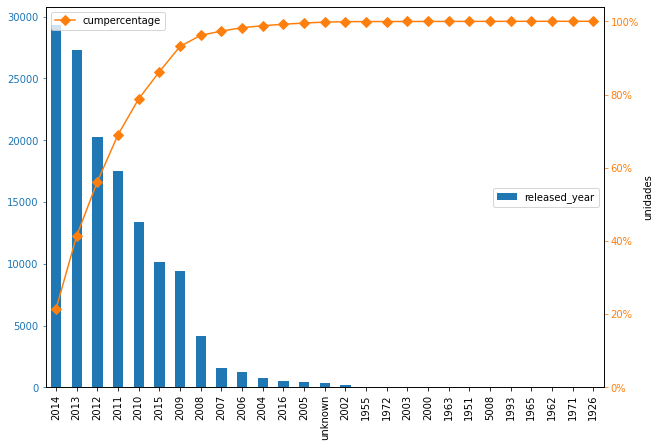

In [15]:
create_pareto_diagram(df,"released_year")

Se observa el desbalanceo que existe de imagenes respecto al año de fabricación, por lo que para normalizar los datos se optará a quitar está variable

##cars196

In [16]:
from object_detection_TFM.dataset.cars196 import cars196
import tensorflow_datasets as tfds

path_images= "/content/images/" #@param {type:"string"}

cars196.Cars196()
cars_builder=tfds.builder("cars196")
cars_builder.download_and_prepare(download_dir=path_images)

Dataset cars196 downloaded and prepared to /root/tensorflow_datasets/cars196/2.0.0. Subsequent calls will reuse this data.


Solo se analizarán las imágenes de entrenamiento debido a que de las imágenes de Test no se han encontrado las etiquetas y se desea hacer una análisis rápido

In [17]:
data_annotations_path_train="/content/images/extracted/TAR_GZ.ai.stanford.edu_jkrause_cars_car_devkituX3rRjr31Ytr-qGLKk3pgp8PeejOZj36kmG_eBDprM0.tgz/devkit/cars_train_annos.mat"

import tensorflow as tf

# image_dict = returnImageDict(path_train)

# bbox_dict = returnBbox(data_annotations_path_train, image_dict)
'''
-cars_train_annos.mat:
  Contains the variable 'annotations', which is a struct array of length
  num_images and where each element has the fields:
    bbox_x1: Min x-value of the bounding box, in pixels
    bbox_x2: Max x-value of the bounding box, in pixels
    bbox_y1: Min y-value of the bounding box, in pixels
    bbox_y2: Max y-value of the bounding box, in pixels
    class: Integral id of the class the image belongs to.
    fname: Filename of the image within the folder of images.
'''
def create_dataframe_cars196(data_annotations):
  df=pd.DataFrame()


  with tf.io.gfile.GFile(data_annotations, 'rb') as f:
    mat = tfds.core.lazy_imports.scipy.io.loadmat(f)
    for example in mat['annotations'][0]:
      image_name = example[-1].item().split('.')[0]
      label = cars196._NAMES[example[4].item() - 1]

      features = {
            'label': label,
            'filename':str(image_name),
        }
      df=df.append(features,ignore_index=True)  
  return df
df=create_dataframe_cars196(data_annotations_path_train)
# df_test=create_dataframe_cars196(data_annotations_path_test) 


A través de label se generan las características make, model y released para hacer una similitud con el dataset anterior

In [18]:
df["make_id"]=df.label.str.split(" ").str[0]
df["model_id"]=df.label.str.split(" ").str[1:-1].str.join(" ")
df["released_year"]=df.label.str.split(" ").str[-1]
df

,filename,label,make_id,model_id,released_year
0,00001,Audi TTS Coupe 2012,Audi,TTS Coupe,2012
1,00002,Acura TL Sedan 2012,Acura,TL Sedan,2012
2,00003,Dodge Dakota Club Cab 2007,Dodge,Dakota Club Cab,2007
3,00004,Hyundai Sonata Hybrid Sedan 2012,Hyundai,Sonata Hybrid Sedan,2012
4,00005,Ford F-450 Super Duty Crew Cab 2012,Ford,F-450 Super Duty Crew Cab,2012
...,...,...,...,...,...
8139,08140,Chrysler Town and Country Minivan 2012,Chrysler,Town and Country Minivan,2012
8140,08141,smart fortwo Convertible 2012,smart,fortwo Convertible,2012
8141,08142,Mercedes-Benz SL-Class Coupe 2009,Mercedes-Benz,SL-Class Coupe,2009
8142,08143,Ford GT Coupe 2006,Ford,GT Coupe,2006


Destacar que no se tiene en ningún momento el viewpoint el cual es muy útil

In [19]:
from object_detection_TFM.dataset.analisis_dataset import create_pareto_diagram

               make_id  cumpercentage
Chevrolet          905      11.112475
Dodge              630      18.848232
Audi               589      26.080550
BMW                531      32.600688
Ford               521      38.998035
Hyundai            438      44.376228
Mercedes-Benz      261      47.581041
Chrysler           260      50.773576
Acura              242      53.745088
GMC                238      56.667485
Bentley            238      59.589882
Jeep               220      62.291257
Nissan             171      64.390963
Toyota             168      66.453831
Suzuki             167      68.504420
Ferrari            164      70.518173
Lamborghini        161      72.495088
Honda              161      74.472004
Buick              158      76.412083
Aston              157      78.339882
Volkswagen         132      79.960707
Volvo              131      81.569253
Cadillac           129      83.153242
Rolls-Royce        114      84.553045
Spyker              88      85.633595
Land        

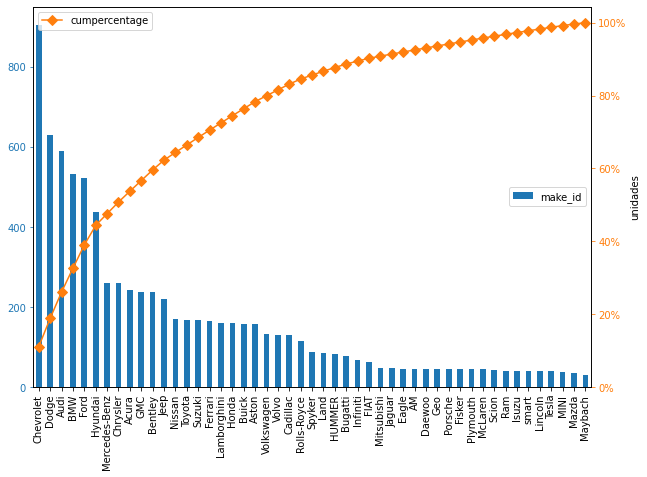

In [20]:
create_pareto_diagram(df,"make_id")

                                    model_id  cumpercentage
Durango SUV                               90       1.105108
Golf Hatchback                            89       2.197937
F-150 Regular Cab                         88       3.278487
S4 Sedan                                  85       4.322200
Caliber Wagon                             83       5.341356
...                                      ...            ...
Phantom Drophead Coupe Convertible        31      98.637033
Express Cargo Van                         30      99.005403
Landaulet Convertible                     29      99.361493
500 Abarth                                28      99.705305
Accent Sedan                              24     100.000000

[189 rows x 2 columns]


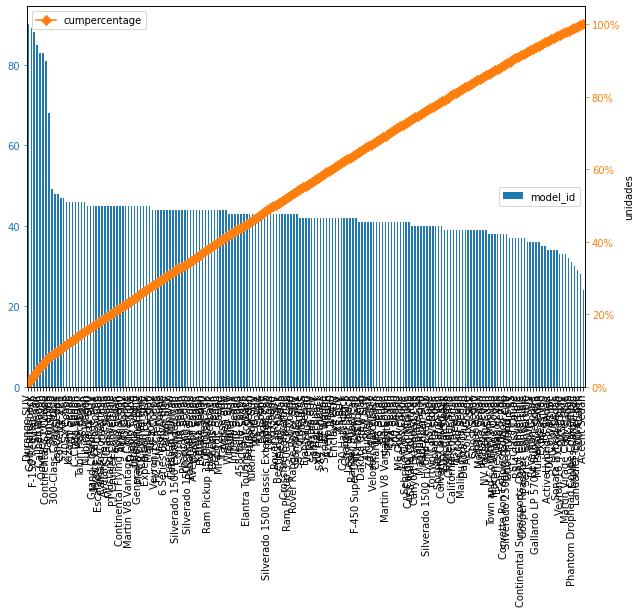

In [21]:
create_pareto_diagram(df,"model_id")

      released_year  cumpercentage
2012           4818      59.160118
2007           1059      72.163556
2009            540      78.794204
2010            413      83.865422
2011            312      87.696464
2008            283      91.171415
1993            139      92.878193
1994            128      94.449902
1998             92      95.579568
2001             90      96.684676
2006             46      97.249509
1991             46      97.814342
2000             45      98.366896
2002             45      98.919450
1997             44      99.459725
1999             44     100.000000


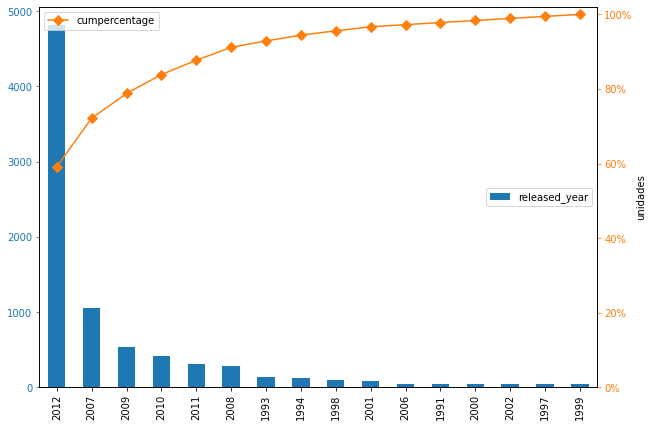

In [22]:
create_pareto_diagram(df,"released_year")

In [23]:
data=df["viewpoint"].value_counts()

KeyError: ignored

In [ ]:
data.sort_values()